## XGBoost

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
df=pd.read_csv("Online_Sales_Data.csv")

In [4]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [5]:
df.drop(['Transaction ID','Date','Product Name'],axis=1,inplace=True)

In [8]:
df.head()

,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,Electronics,2,999.99,1999.98,North America,Credit Card
1,Home Appliances,1,499.99,499.99,Europe,PayPal
2,Clothing,3,69.99,209.97,Asia,Debit Card
3,Books,4,15.99,63.96,North America,Credit Card
4,Beauty Products,1,89.99,89.99,Europe,PayPal


In [7]:
df['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [10]:
df['Region'].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

In [11]:
df['Payment Method'].unique()

array(['Credit Card', 'PayPal', 'Debit Card'], dtype=object)

In [12]:
df['Product Category'].replace(' ','_',regex=True,inplace=True)
df.head()

C:\Users\Surbhi\AppData\Local\Temp\ipykernel_27340\3711433095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Category'].replace(' ','_',regex=True,inplace=True)


,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,Electronics,2,999.99,1999.98,North America,Credit Card
1,Home_Appliances,1,499.99,499.99,Europe,PayPal
2,Clothing,3,69.99,209.97,Asia,Debit Card
3,Books,4,15.99,63.96,North America,Credit Card
4,Beauty_Products,1,89.99,89.99,Europe,PayPal


In [17]:
df['Payment Method'].replace(' ','_',regex=True,inplace=True)

C:\Users\Surbhi\AppData\Local\Temp\ipykernel_27340\1471172553.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment Method'].replace(' ','_',regex=True,inplace=True)


In [18]:
df['Region'].replace(' ','_',regex=True,inplace=True)

C:\Users\Surbhi\AppData\Local\Temp\ipykernel_27340\1390666445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region'].replace(' ','_',regex=True,inplace=True)


In [19]:
df['Product Category'].unique()

array(['Electronics', 'Home_Appliances', 'Clothing', 'Books',
       'Beauty_Products', 'Sports'], dtype=object)

In [20]:
df['Region'].unique()

array(['North_America', 'Europe', 'Asia'], dtype=object)

In [21]:
df['Payment Method'].unique()

array(['Credit_Card', 'PayPal', 'Debit_Card'], dtype=object)

In [23]:
df.columns=df.columns.str.replace(' ','_')
df.head()

,Product_Category,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method
0,Electronics,2,999.99,1999.98,North_America,Credit_Card
1,Home_Appliances,1,499.99,499.99,Europe,PayPal
2,Clothing,3,69.99,209.97,Asia,Debit_Card
3,Books,4,15.99,63.96,North_America,Credit_Card
4,Beauty_Products,1,89.99,89.99,Europe,PayPal


In [24]:
df.dtypes

Product_Category     object
Units_Sold            int64
Unit_Price          float64
Total_Revenue       float64
Region               object
Payment_Method       object
dtype: object

In [25]:
df['Total_Revenue']=pd.to_numeric(df['Total_Revenue']) # if type=object for numeric do conversion using this

In [32]:
len(df.loc[df['Payment_Method']==' ']) #check for missing values

0

In [33]:
X=df.drop('Payment_Method',axis=1).copy()

In [35]:
y=df['Payment_Method'].copy()

In [37]:
y.head()

0    Credit_Card
1         PayPal
2     Debit_Card
3    Credit_Card
4         PayPal
Name: Payment_Method, dtype: object

In [131]:
X_encoded=pd.get_dummies(X,columns=['Product_Category','Region'])
X_encoded = X_encoded.astype(int)

In [132]:
X_encoded.head()

,Units_Sold,Unit_Price,Total_Revenue,Product_Category_Beauty_Products,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home_Appliances,Product_Category_Sports,Region_Asia,Region_Europe,Region_North_America
0,2,999,1999,0,0,0,1,0,0,0,0,1
1,1,499,499,0,0,0,0,1,0,0,1,0
2,3,69,209,0,0,1,0,0,0,1,0,0
3,4,15,63,0,1,0,0,0,0,0,0,1
4,1,89,89,1,0,0,0,0,0,0,1,0


In [162]:
X_encoded.dtypes

Units_Sold                          int32
Unit_Price                          int32
Total_Revenue                       int32
Product_Category_Beauty_Products    int32
Product_Category_Books              int32
Product_Category_Clothing           int32
Product_Category_Electronics        int32
Product_Category_Home_Appliances    int32
Product_Category_Sports             int32
Region_Asia                         int32
Region_Europe                       int32
Region_North_America                int32
dtype: object

In [133]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
df_encoded = pd.DataFrame(y_encoded, columns=['Payment_Method_Encoded'])

In [134]:
df_encoded

,Payment_Method_Encoded
0,0
1,2
2,1
3,0
4,2
...,...
235,2
236,1
237,0
238,2


In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_encoded,df_encoded,test_size=0.2,random_state=0)

In [155]:
train = xgb.DMatrix(X_train,label=y_train)
test= xgb.DMatrix(X_test,label=y_test)

In [156]:
param = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3} 
epochs = 20 

In [157]:
model = xgb.train(param, train, epochs)

In [158]:
predictions = model.predict(test)

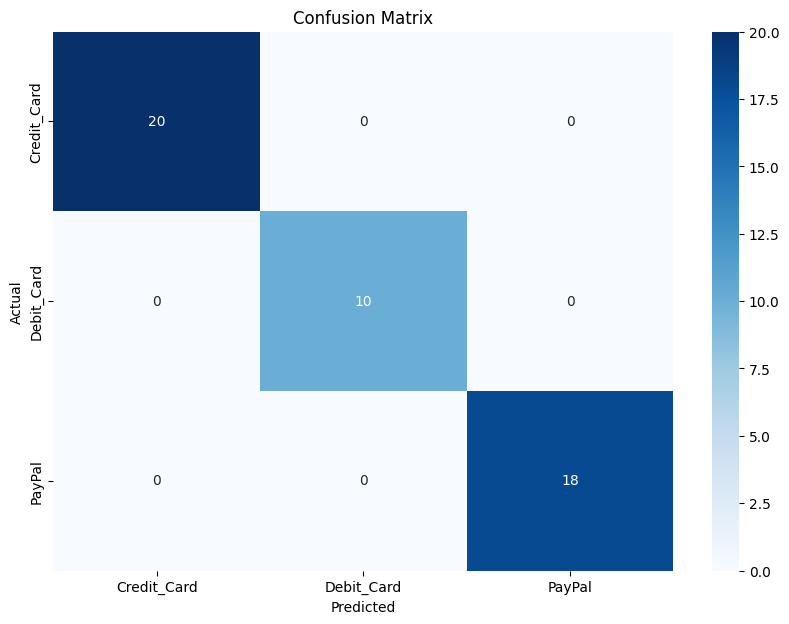

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [160]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

## Neural Network Implementation

In [196]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
model = Sequential([
    Dense(units=32,activation='relu',input_dim=len(X_train.columns)),
    Dense(units=64,activation='relu'),
    Dense(units=3,activation='softmax')
])

C:\Users\Surbhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [203]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=110, batch_size=32)

# Predict on the test set
y_hat_prob = model.predict(X_test)
y_hat = np.argmax(y_hat_prob, axis=1)

# Convert true labels to integer format for comparison
y_test = y_test.flatten()

# Print predictions and true labels
print("Predictions:", y_hat)
print("True Labels:", y_test)



Epoch 1/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9283 - loss: 0.4293
Epoch 2/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9440 - loss: 0.3666 
Epoch 3/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9493 - loss: 0.2190 
Epoch 4/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.2006 
Epoch 5/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9950 - loss: 0.0108 
Epoch 6/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0160 
Epoch 7/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9928 - loss: 0.0259 
Epoch 8/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0075 
Epoch 9/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9941 - loss: 0.0268 
Epoch 10/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9821 - loss: 0.0554 
Epoch 11/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0171 
Epoch 12/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss

In [204]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:", accuracy)

Accuracy: 1.0


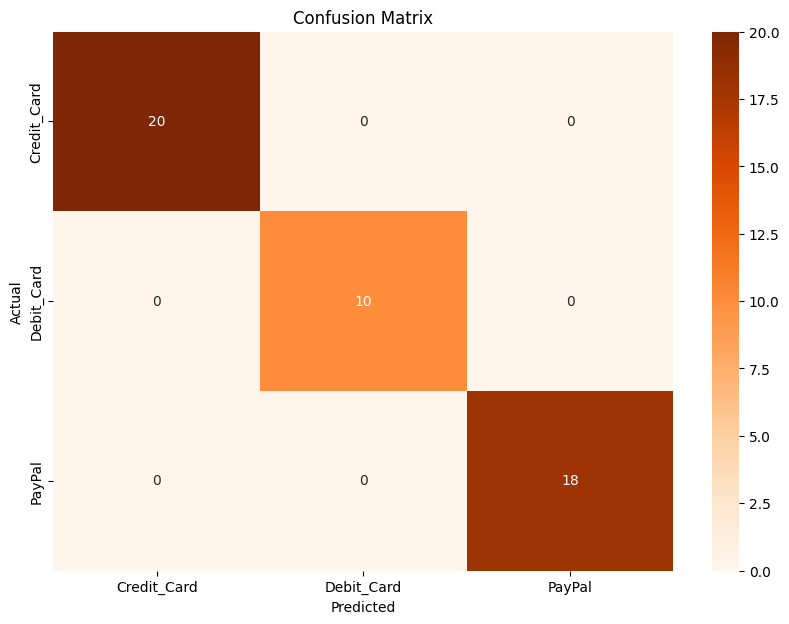

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
